
# Best Neighborhood in Pittsburgh

### Introduction

Our mission to find the best neighborhood in Pittsburgh is based fundamentally on living standard. This concept is wide ranging and can depend on many things, such as the economy, health care, and education. Since we are limited to using datasets provided on the WPRDC website, we decided to find datasets which reflect some aspect to standard of living which also is measured according to neighborhoods. 

### Datasets and metrics 
Our datasets include educational attainment, household income, and housing unit value. These datasets were all taken from the same survey, so their structure is similar, and they contain all of the same neighborhoods. 

1. Educational Attainment can be a good indicator of standard of living. Access to higher education is seen as a pillar of developement and standard of living in a developed country. This also usually correlates with other factors that lead to higher standards of living, such as higher income, which in turn leads to better access to healthcare and nutrion.

2. Household income over a 12 month period is a straightforward indicator of standard of living. We may not like it, but having access to money provides access to many other important things in life, such as healthcare, education, food, housing, and other recreational activities that are important to people's mental health. 

3. Housing Unit Values per neighborhood gives us a metric in which we can determine the housing prices in the neighborhood. In most scenarios, neighboorhoods with a higher housing price means that it is a safer, more wealthy neighboorhood. There is usually a direct relationship between Housing prices and crime, public services, etc. By choosing to use Housing Unit Values, we are able to combine lots of factors that make a neighborhood together.


### Educational Attainment 

This dataset shows the level of education for each neighborhood in Pittsburgh. The ranges are broken down by grade level, and then degree attainment according to the highest level the person achieved. Our metric is measuring the proportion of the population of the neighborhood that has a Bachelor's Degree or higher. This is an arbitrary but understandable milestone to judge the level of education. We are making the assumption that a population with higher levels of education also has a higher standard of living, because they have more opportunities to get higher paying jobs.

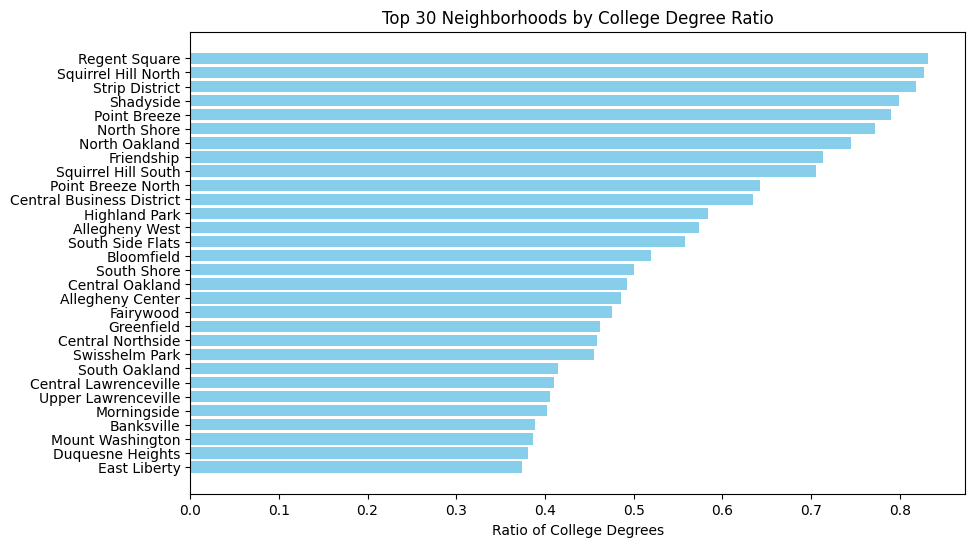

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

education = pd.read_csv("education.csv")

college = [
    "Estimate; Total: - Bachelor's degree",
    "Estimate; Total: - Master's degree",
    "Estimate; Total: - Professional school degree",
    "Estimate; Total: - Doctorate degree",
]

education["College Degrees"] = education[college].sum(axis=1)

education["Total Population"] = education['Estimate; Total:']
education["Ratio of College"] = education["College Degrees"] / education["Total Population"]

# Display the ratio for each neighborhood
education_result = education[['Neighborhood', 'Total Population', 'College Degrees', 'Ratio of College']]
education_result = education_result.sort_values(by='Ratio of College', ascending=False)

top_neighborhoods = education_result.head(30)

plt.figure(figsize=(10, 6))
plt.barh(top_neighborhoods['Neighborhood'], top_neighborhoods['Ratio of College'], color='skyblue')
plt.xlabel('Ratio of College Degrees')
plt.title('Top 30 Neighborhoods by College Degree Ratio')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

plt.show()

### Household Income 

This dataset lists the household incomes by income bracket for each neighborhood. They have the total number of households in the neighborhood and then columns for each income bracket. We can measure the level of affluence of a neighborhood by looking at the number of households that make more than $100,000 in income. This is an arbitrary standard, but one which many americans seem to see as a significant milestone. We can then take the ratio of households with over 100K compared to all households in the neighborhood and then compare the ratios between neighborhoods to try to nullify population differences between neighborhoods. 


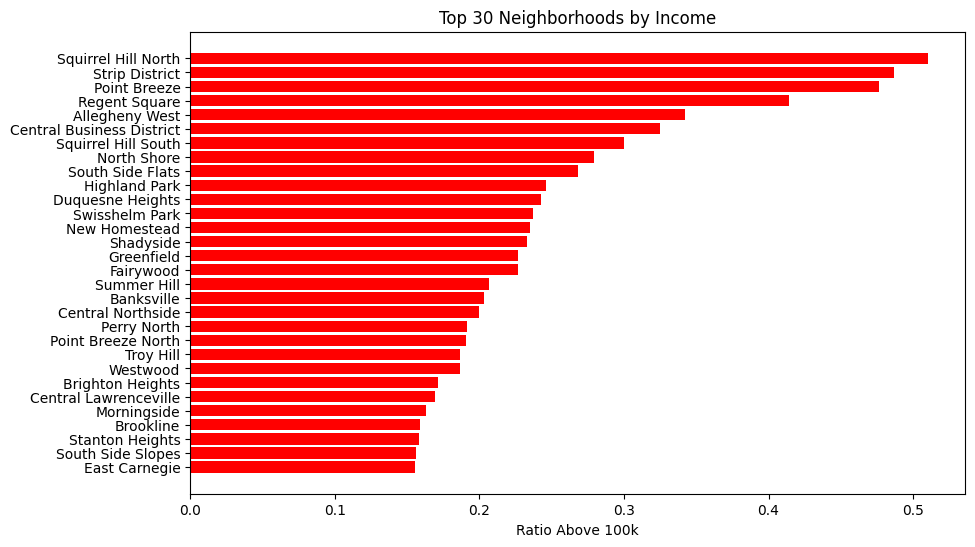

In [12]:
incomes = pd.read_csv("household-income.csv")

above100k = [
    "Estimate; Total: - $100,000 to $124,999",
    "Estimate; Total: - $125,000 to $149,999",
    "Estimate; Total: - $150,000 to $199,999",
    "Estimate; Total: - $200,000 or more",
]

incomes["Income Above 100k"] = incomes[above100k].sum(axis=1)

incomes["Total Households"] = incomes['Estimate; Total:']
incomes["Ratio Above 100k"] = incomes["Income Above 100k"] / incomes["Total Households"]

# Display the ratio for each neighborhood
income_result = incomes[['Neighborhood', 'Total Households', 'Income Above 100k', 'Ratio Above 100k']]
income_result = income_result.sort_values(by='Ratio Above 100k', ascending=False)
#result.head(30)

top_neighborhoods = income_result.head(30)

plt.figure(figsize=(10, 6))
plt.barh(top_neighborhoods['Neighborhood'], top_neighborhoods['Ratio Above 100k'], color='red')
plt.xlabel('Ratio Above 100k')
plt.title('Top 30 Neighborhoods by Income')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

plt.show()

### Housing Unit Values

This dataset consists of a set of ranges of prices for housing in each neighborhood. We took the houses with a value of 250,000 dollars for each neighboor and decided to make that the cut-off for a good and bad house. We find how many houses are worth over \$250,000 in each neighborhood and divide it by the total houses in the dataset for the neighborhood. This gives us a ratio, the higher the ratio the better.

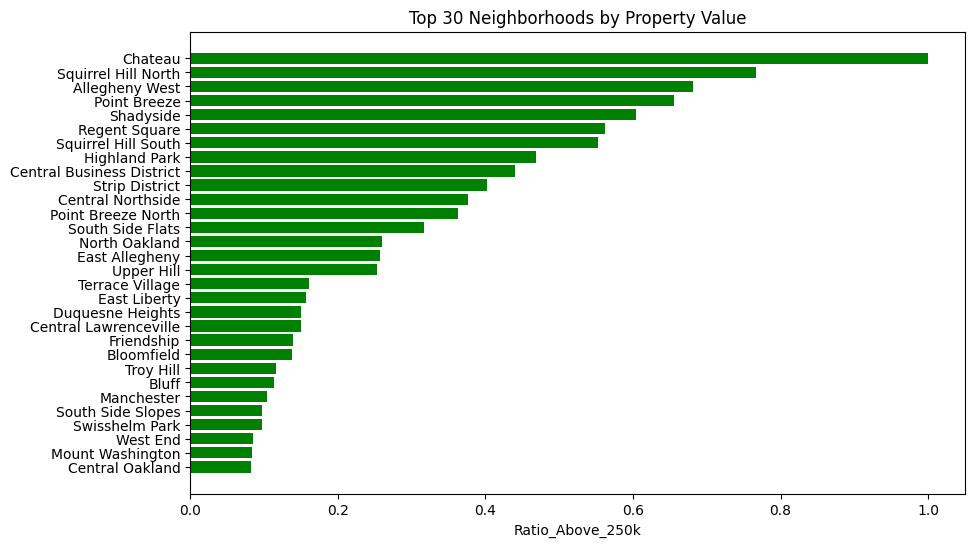

In [13]:
houses = pd.read_csv("Housing_Unit.csv")

# Select relevant columns for house values above $250,000
above250k = [
    "Estimate; Total: - $250,000 to $299,999",
    "Estimate; Total: - $300,000 to $399,999",
    "Estimate; Total: - $400,000 to $499,999",
    "Estimate; Total: - $500,000 to $749,999",
    "Estimate; Total: - $750,000 to $999,999",
    "Estimate; Total: - $1,000,000 to $1,499,999",
    "Estimate; Total: - $1,500,000 to $1,999,999",
    "Estimate; Total: - $2,000,000 or more"
]


# Sum the values above $250,000 for each neighborhood
houses['Houses_Above_250k'] = houses[above250k].sum(axis=1)

# Calculate the ratio of houses worth over $250,000 to total houses
houses['Total_Houses'] = houses['Estimate; Total:']
houses['Ratio_Above_250k'] = houses['Houses_Above_250k'] / houses['Total_Houses']

# Display the ratio for each neighborhood
house_result = houses[['Neighborhood', 'Total_Houses', 'Houses_Above_250k', 'Ratio_Above_250k']]
house_result = house_result.sort_values(by='Ratio_Above_250k', ascending=False)

top_neighborhoods = house_result.head(30)

plt.figure(figsize=(10, 6))
plt.barh(top_neighborhoods['Neighborhood'], top_neighborhoods['Ratio_Above_250k'], color='green')
plt.xlabel('Ratio_Above_250k')
plt.title('Top 30 Neighborhoods by Property Value')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

plt.show()

### Combination Metric 

Since we had 3 datasets with similar structure and based on proportions of the populations of neighborhoods, we can combine the 3 ratios into 1 number to have an ultimate metric.

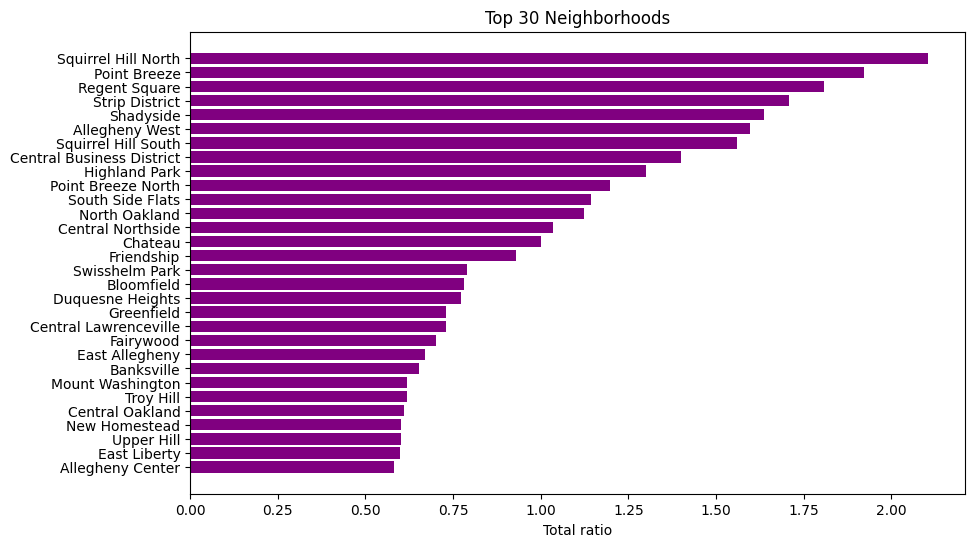

In [26]:
education_ratio = education_result[['Neighborhood', 'Ratio of College']]
housing_ratio = house_result[['Neighborhood', 'Ratio_Above_250k']]
income_ratio = income_result[['Neighborhood', 'Ratio Above 100k']]

# merge the tables on neighborhood column
combined = education_ratio.merge(housing_ratio, on='Neighborhood').merge(income_ratio, on='Neighborhood')

# add up the ratios from each
combined['Total Ratio'] = combined['Ratio of College'] + combined['Ratio_Above_250k'] + combined['Ratio Above 100k']

# Keep only the Neighborhood and Total Ratio columns
final_result = combined[['Neighborhood', 'Total Ratio']].sort_values(by='Total Ratio', ascending=False)

# Display the combined table
final_result

top_neighborhoods = final_result.head(30)

plt.figure(figsize=(10, 6))
plt.barh(top_neighborhoods['Neighborhood'], top_neighborhoods['Total Ratio'], color='Purple')
plt.xlabel('Total ratio')
plt.title('Top 30 Neighborhoods')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

plt.show()



## Conclusion 

In conclusion, using these datasets and metrics we can see that a few neighborhoods are at the top of all of these charts, such as Squirell Hill, Regent Square, and Point Breeze. This aligns with our own experience living in Pittsburgh. These neighborhoods have nice and expensive houses, the people who live there are educated and wealthier, there is less crime as a result, and they are generally kept clean. 

The combined metric shows the number one neighborhood is.... (drumroll) Squirrel Hill North. If you've been in the area this will not be too much of a surprise to you!

Some potential downsides to our data analytics is that the datasets all came from the same large survey in 2015. This is almost 10 years ago. We thought it was still appropriate to use this data, because even though the economy has changed since then, the relative relationships between neighborhoods likely has not. For example, housing prices have gone up since then, but I expect that the houses in Squirrel Hill have gone up approximately at the same rate as houses in Oakland, so they may both be higher numbers, but their relative values are about the same. 